Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning.

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [35]:
AAPL = pd.read_csv('AAPL.csv')
AMZN =  pd.read_csv('AMZN.csv')
FB = pd.read_csv('FB.csv')
GOOG =  pd.read_csv('GOOG.csv')
NFLX = pd.read_csv('NFLX.csv')
TSLA = pd.read_csv('TSLA.csv')

In [36]:
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [5]:
training_set = TSLA.iloc[:800, 1:2].values
test_set = TSLA.iloc[800:, 1:2].values

In [6]:
# reshaping the data: format: (value,time-steps,1D output)
# lag of 1 day
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
# LSTM with 40 neurons and 3 hidden layers
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 12s 90ms/step - loss: 0.1410
Epoch 2/100
24/24 [==============================] - 2s 88ms/step - loss: 0.0132
Epoch 3/100
24/24 [==============================] - 2s 88ms/step - loss: 0.0067
Epoch 4/100
24/24 [==============================] - 2s 88ms/step - loss: 0.0064
Epoch 5/100
24/24 [==============================] - 2s 88ms/step - loss: 0.0053
Epoch 6/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0053
Epoch 7/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0056
Epoch 8/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0045
Epoch 9/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0049
Epoch 10/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0053
Epoch 11/100
24/24 [==============================] - 2s 87ms/step - loss: 0.0043
Epoch 12/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0046
Epoch 13/100
24/24 [====

In [43]:
dataset_train = TSLA.iloc[:800, 1:2]
dataset_test = TSLA.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [44]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

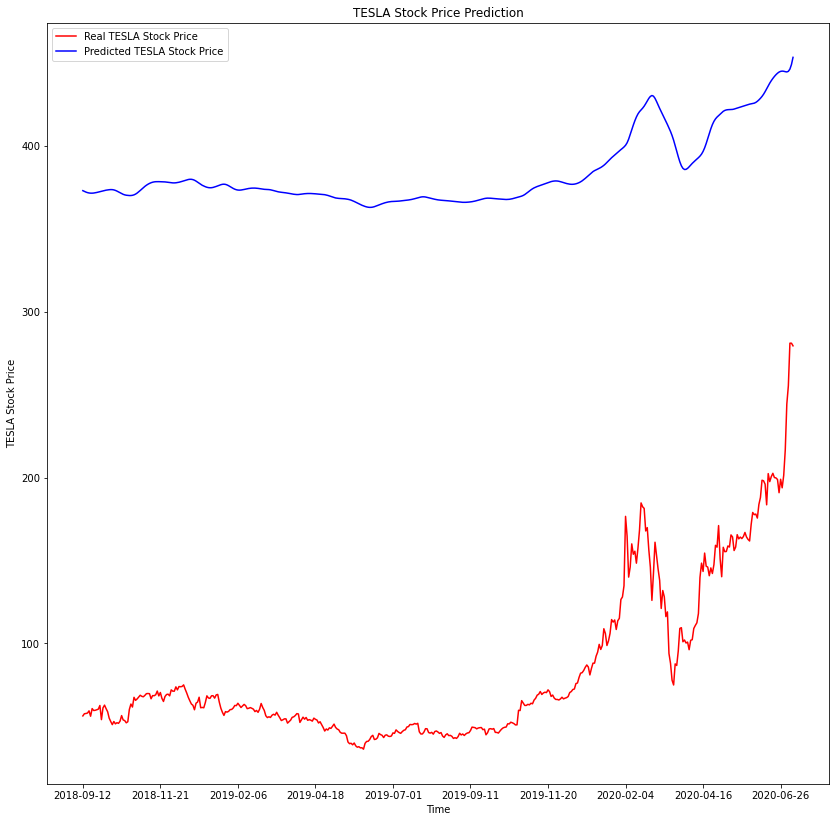

In [48]:
# Visualising the results
plt.plot(TSLA.loc[800:, 'Date'],dataset_test.values[:,0], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(TSLA.loc[800:, 'Date'],predicted_stock_price[:,0], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.rcParams['figure.figsize'] = [14, 14]
plt.legend()
plt.show()